In [1]:
from utils import *
import numpy as np 
from scipy.sparse import csr_matrix
import scipy.sparse as sparse
import scipy.stats as stats
import matplotlib.pyplot as plt 

## (np.meshgrid, arange, plotting)

In [2]:
points = np.arange(-5, 5, 0.01)

In [3]:
points.shape

(1000,)

In [4]:
x, y = np.meshgrid(points, points)
x[:10]

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [5]:
z = np.sqrt(x ** 2 + y ** 2)

Text(0.5, 1.0, 'Image plot of $sqrt{x^2 + y^2}$ for a grid of values')

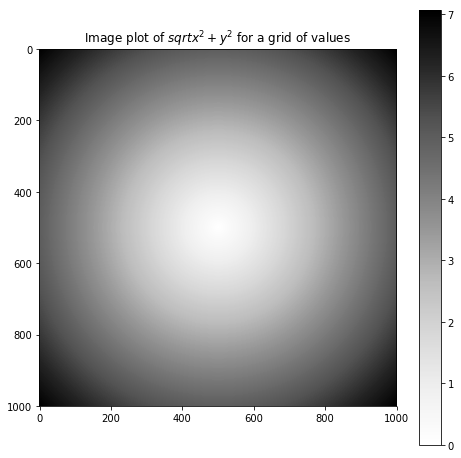

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(z, cmap=plt.cm.Greys)
plt.colorbar()
plt.title("Image plot of $sqrt{x^2 + y^2}$ for a grid of values")

## Sparse matrix

In [7]:
A = create_matrix_random(5, 5, -10, 5)

In [8]:
A[A < 0] = 0
A

array([[0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 6, 0, 1, 0],
       [0, 0, 4, 1, 0],
       [4, 2, 1, 0, 0]])

In [9]:
S = csr_matrix(A)

In [10]:
print(S)

  (0, 3)	1
  (0, 4)	1
  (1, 2)	1
  (2, 1)	6
  (2, 3)	1
  (3, 2)	4
  (3, 3)	1
  (4, 0)	4
  (4, 1)	2
  (4, 2)	1


In [11]:
sparcity = 1.0 - np.count_nonzero(A) / A.size
sparcity

0.6

In [12]:
# Set random seed
np.random.seed(42)
# Create sparse matrix with density, elements other than 0 are 1
S = sparse.random(5, 5, density=0.25, data_rvs=np.ones)

In [13]:
print(S)

  (1, 1)	1.0
  (4, 3)	1.0
  (4, 2)	1.0
  (0, 2)	1.0
  (2, 1)	1.0
  (0, 4)	1.0


In [14]:
A = S.toarray()
A

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

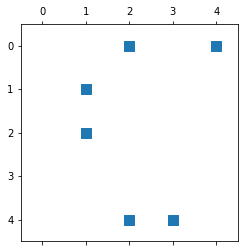

In [15]:
plt.spy(S)